In [2]:
import numpy as np
import pandas as pd
import os
import os
import json
import shutil

In [9]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [10]:
# Configuration
DATASET_NAME = "Documnets Dataset"
KAGGLE_USERNAME = "bousalihhamza"
DATASET_ID = f"{KAGGLE_USERNAME}/{DATASET_NAME.replace(' ', '-').lower()}"
BASE_DIR = "/kaggle/working/my_dataset"
IMAGE_SOURCE_DIR = "/kaggle/input/belarus-old-passport/_output_/data/images/train"
BATCH_SIZE = 100

In [11]:
# Function to create metadata file
def create_metadata(dataset_path):
    metadata = {
        "title": DATASET_NAME,
        "id": DATASET_ID,
        "licenses": [{"name": "CC0-1.0"}]
    }
    with open(os.path.join(dataset_path, "dataset-metadata.json"), "w") as f:
        json.dump(metadata, f, indent=4)

In [13]:
# # Initialize Kaggle API
# api = KaggleApi()
# api.authenticate()

In [14]:
# Create dataset directory
os.makedirs(BASE_DIR, exist_ok=True)
create_metadata(BASE_DIR)

In [15]:
# Get list of images
image_files = [f for f in os.listdir(IMAGE_SOURCE_DIR) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [17]:
# for i in range(0, len(image_files), BATCH_SIZE):
#     batch = image_files[i:i + BATCH_SIZE]
#     batch_dir = os.path.join(BASE_DIR, f"batch_{i//BATCH_SIZE + 1}")
#     os.makedirs(batch_dir, exist_ok=True)

#     # Copy images to batch directory
#     for img in batch:
#         shutil.copy(os.path.join(IMAGE_SOURCE_DIR, img), os.path.join(batch_dir, img))

#     # Upload batch to Kaggle
#     is_new_dataset = (i == 0)
#     if is_new_dataset:
#         !kaggle datasets create -p {BASE_DIR} --public
#     else:
#         !kaggle datasets version -p {BASE_DIR} -m "Adding more images" --delete-old-versions

#     # Clean up to save space
#     shutil.rmtree(batch_dir)

# print("Dataset upload complete!")

In [19]:
IMAGE_SOURCE_DIR + image_files[0]

'/kaggle/input/belarus-old-passport/_output_/data/images/train64601.jpg'

In [20]:
import matplotlib.pyplot as plt
import cv2

In [26]:
from PIL import Image
from IPython.display import display

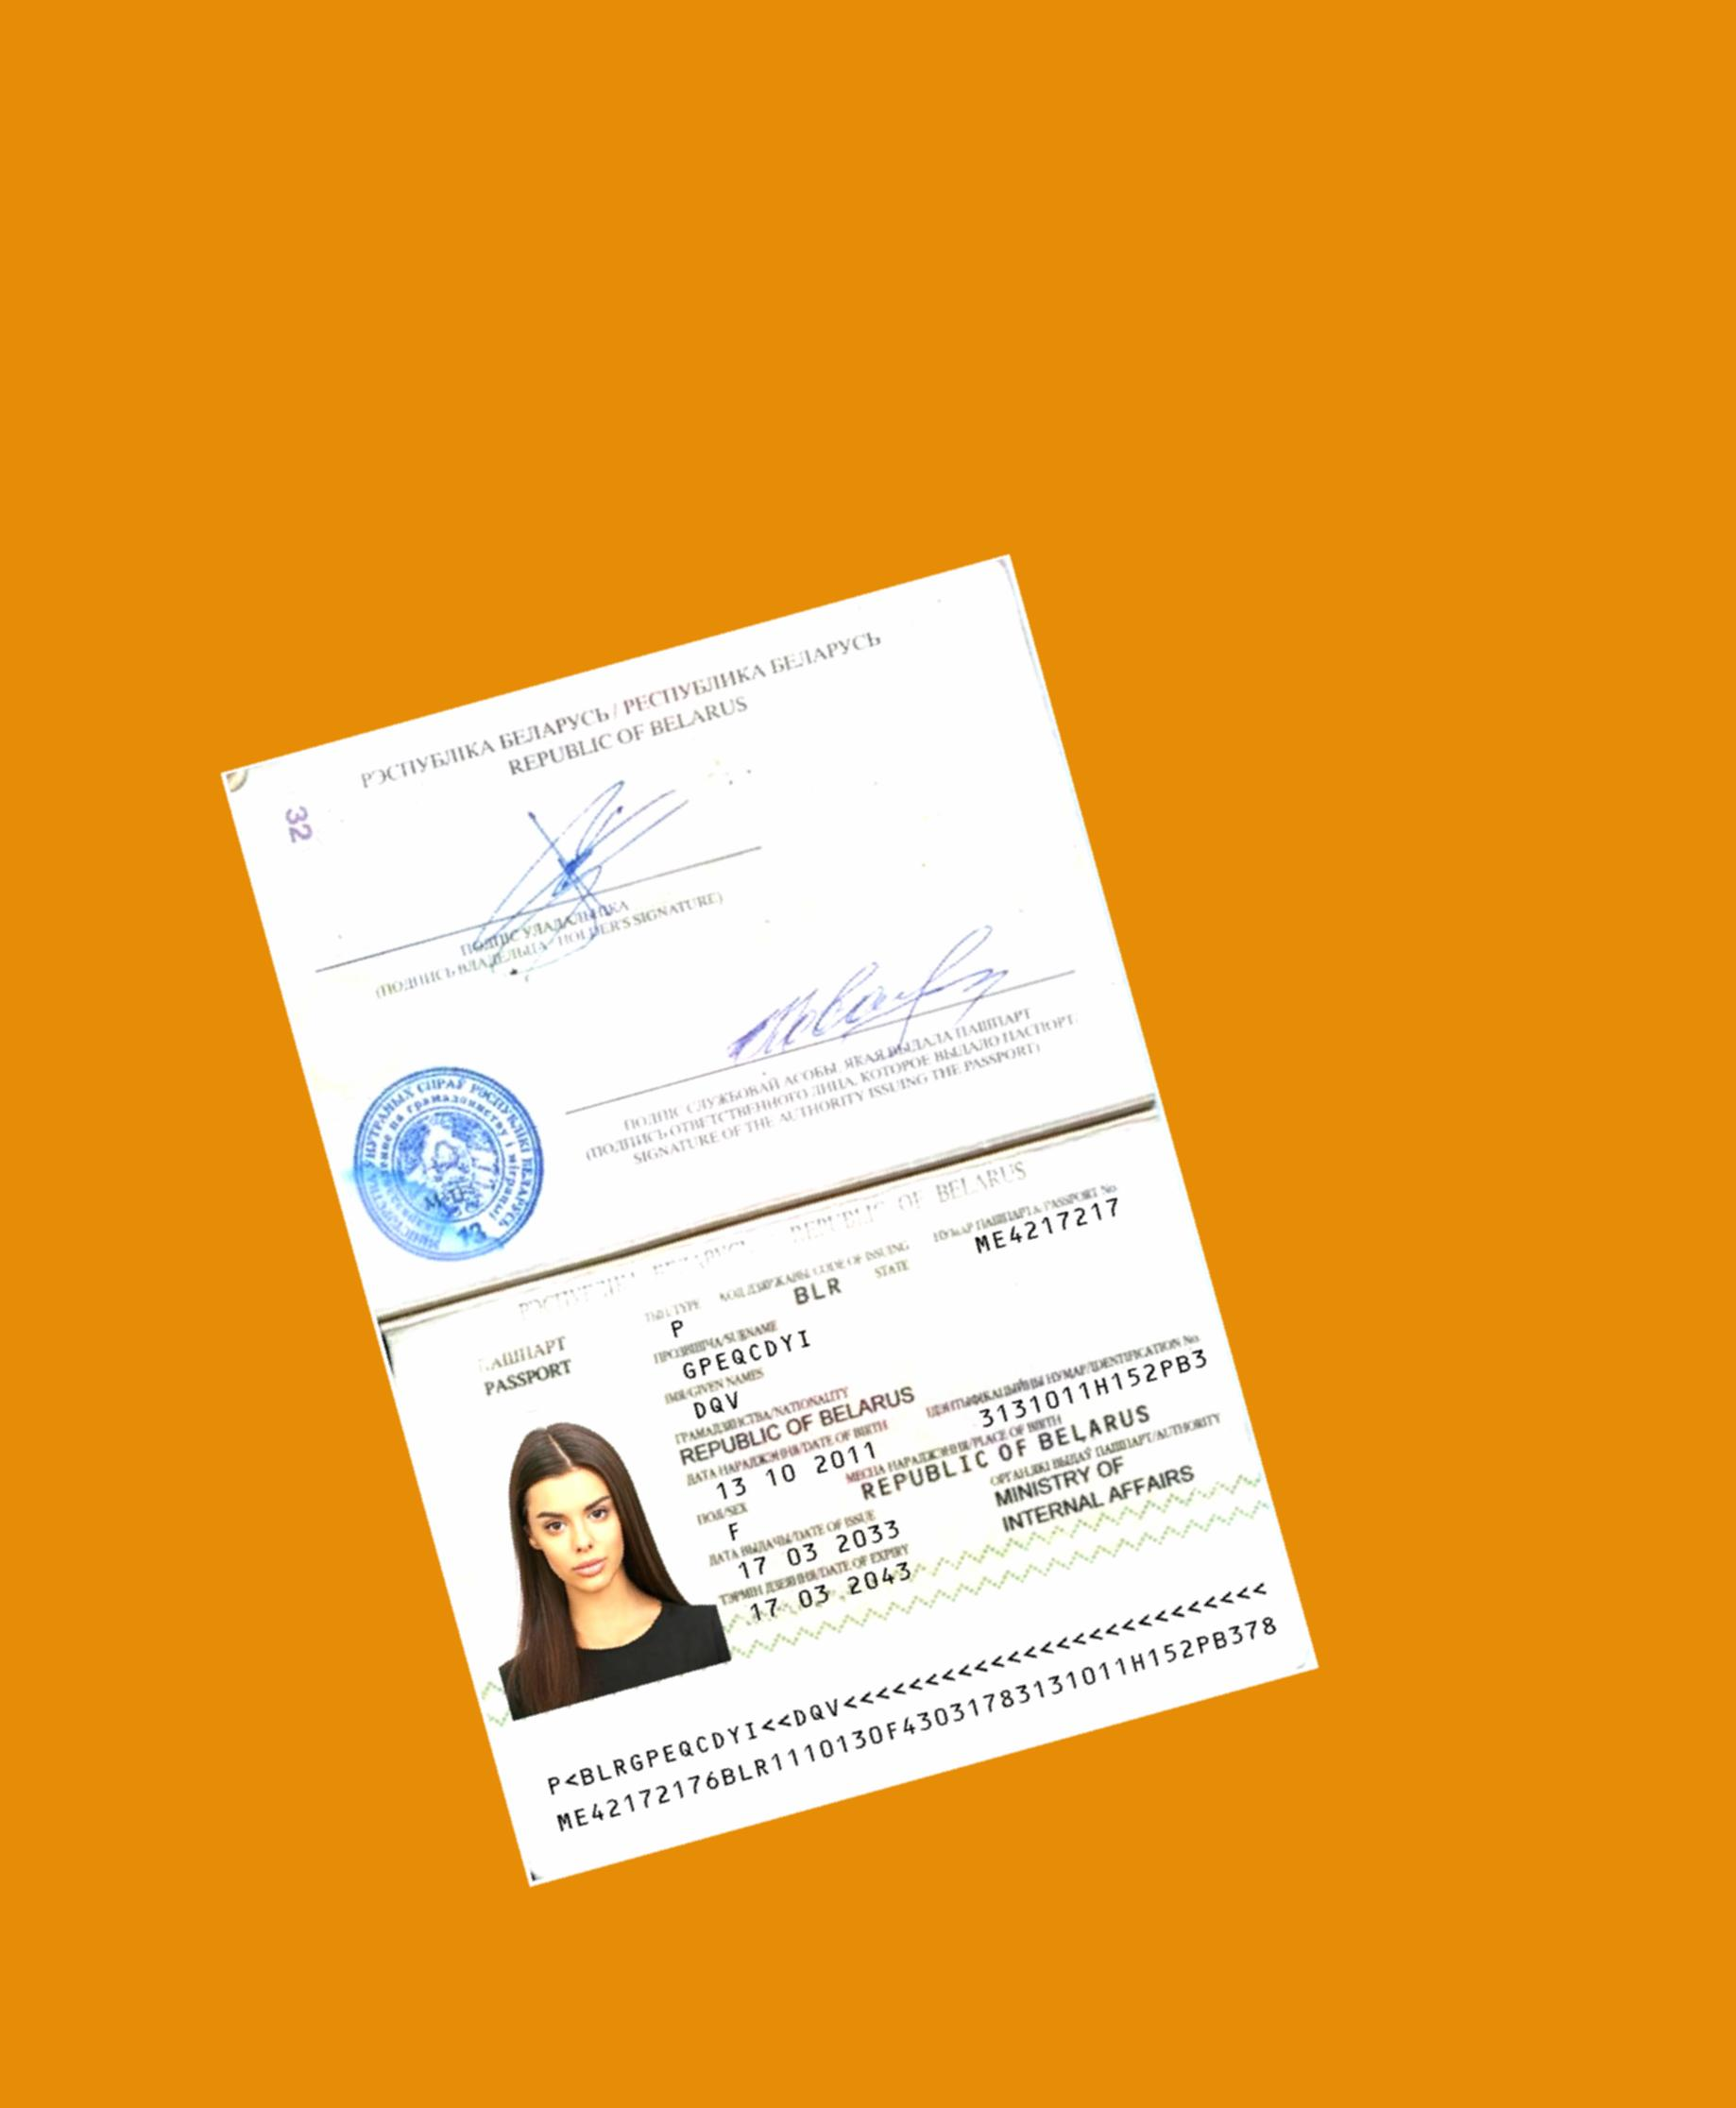

In [28]:
# Define the image path
image_path = IMAGE_SOURCE_DIR + "/" + image_files[0]

# Open and display the image
image = Image.open(image_path)
display(image)

In [29]:
BATCH_SIZE = 1_000

100

In [ ]:
for i in range(0, len(image_files), BATCH_SIZE):
    batch = image_files[i:i + BATCH_SIZE]
    batch_dir = os.path.join(BASE_DIR, f"batch_{i//BATCH_SIZE + 1}")
    os.makedirs(batch_dir, exist_ok=True)

    # Copy images to batch directory
    for img in batch:
        shutil.copy(os.path.join(IMAGE_SOURCE_DIR, img), os.path.join(batch_dir, img))

    # Clean up to save space
    shutil.rmtree(batch_dir)

print("Dataset upload complete!")

In [30]:
import os
import shutil
import zipfile

# Define paths
IMAGE_SOURCE_DIR = "/kaggle/input/belarus-old-passport/_output_/data/images/train"
WORKING_DIR = "/kaggle/working/batches"

# Create working directory if it doesn't exist
os.makedirs(WORKING_DIR, exist_ok=True)

In [31]:
# List all image files
image_files = sorted(os.listdir(IMAGE_SOURCE_DIR))  # Sort to maintain order
BATCH_SIZE = 1000

In [34]:
# Process in batches
for i in range(0, len(image_files), BATCH_SIZE):
    batch = image_files[i:i + BATCH_SIZE]
    batch_name = f"batch_{i // BATCH_SIZE + 1}.zip"
    batch_path = os.path.join(WORKING_DIR, batch_name)

    # Create a zip file
    with zipfile.ZipFile(batch_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for img in batch:
            img_path = os.path.join(IMAGE_SOURCE_DIR, img)
            zipf.write(img_path, img)  # Store image inside zip without full path

    print(f"Created: {batch_name}")
    break

print("All batches compressed and ready for download!")

Created: batch_1.zip
All batches compressed and ready for download!


In [ ]:
image_files = sorted(os.listdir(IMAGE_SOURCE_DIR))  # Ensure consistent ordering
BATCH_SIZE = 100  # Adjust as needed
START_BATCH = 5  # Set the batch number where you want to start (1-based)

# Process images in batches
for i in range((START_BATCH - 1) * BATCH_SIZE, len(image_files), BATCH_SIZE):
    batch = image_files[i:i + BATCH_SIZE]
    batch_number = (i // BATCH_SIZE) + 1
    batch_name = f"batch_{batch_number}.zip"
    batch_path = os.path.join(WORKING_DIR, batch_name)

    # Skip already existing batches
    if os.path.exists(batch_path):
        print(f"Skipping {batch_name} (already exists)")
        continue

    # Create a zip file
    with zipfile.ZipFile(batch_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for img in batch:
            img_path = os.path.join(IMAGE_SOURCE_DIR, img)
            zipf.write(img_path, img)  # Store image inside zip without full path

    print(f"Created: {batch_name}")

print("Selected batches compressed and ready for download!")
